<img src=https://img.gazeta.ru/files3/923/11732923/dicaprio-pic905-895x505-13209.jpg><br>
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Андрей, спасибо за оперативность, всё принято👌
    
Желаю дальнейших успехов и новогоднего настроения☃️
    
Допматериалы:
- из общего:
  - для прокачки <code>SQL</code> и большего понимания как всё устроено, рекомендую <a href="https://www.youtube.com/playlist?list=PLkcP_moW_BpOs4gO6SrPrvXu0sPcTyUyp">youtube лекции</a>
  - Для более приятного и удобного оформления SQL запросов рекомендую <a href="https://zelark.github.io/8-tips-to-make-your-sql-more-readable/">статью</a> к прочтению.
- тренажеры:
  - [SQL-ex](https://www.sql-ex.ru/?Lang=0) - Адская вещь, но заставляет хорошо думать над своим запросом
  - [hackerrank](https://www.hackerrank.com/domains/sql)
  - Одной из моих коллег нравится [khanacademy](https://www.khanacademy.org/computing/computer-programming/sql)
  - и мой любимый способ: самостоятельная практика. Устновить локально postgres\sqlite, найти любые интересные данные, условно, курсы валют, погоду, данные о продажах (например, известный [sample-superstore](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls)) и практиковаться, придумывая себе задачи. А если есть интересующая тебя тема + самостоятельная практика - это лучшее решение
  - оптимизация:
      - начать можно с [этого](https://t.me/double_data/52?single) - НЕиспользование преобразований в WHERE
      - общая информация об использовании [DISTINCT](https://jmarquesdatabeyond.medium.com/sql-like-a-pro-please-stop-using-distinct-31bdb6481256)

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Андрей, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Привет! Я не против на "ты") Спасибо за ревью, ознакомился с правками и доработал их, в местах доработок оставил свои комментарии) </div>

<hr style="border: 2px solid green;" />

# Анализ базы данных сервиса для чтения книг по подписке

В рамках данного исследования необходимо проанализировать базу данных. Полученные данные помогут сформировать ценностное предложение для нового продукта.

**План исследования:**
1. Загрузка данных и знакомство с ними.
2. Анализ данных:
  1. Количество книг, вышедших после 1 января 2000 года.
  2. Количество обзоров и средняя оценка каждой книги.
  3. Определение издательства, выпустившего наибольшее количество книг с более 50 страниц.
  4. Определение автора с самой высокой средней оценкой книг (учитываются книги с > 50 оценок).
  5. Среднее количество обзоров от пользователей (пользователи с > 50 отзывов).
3. Выводы.


**Схема:**
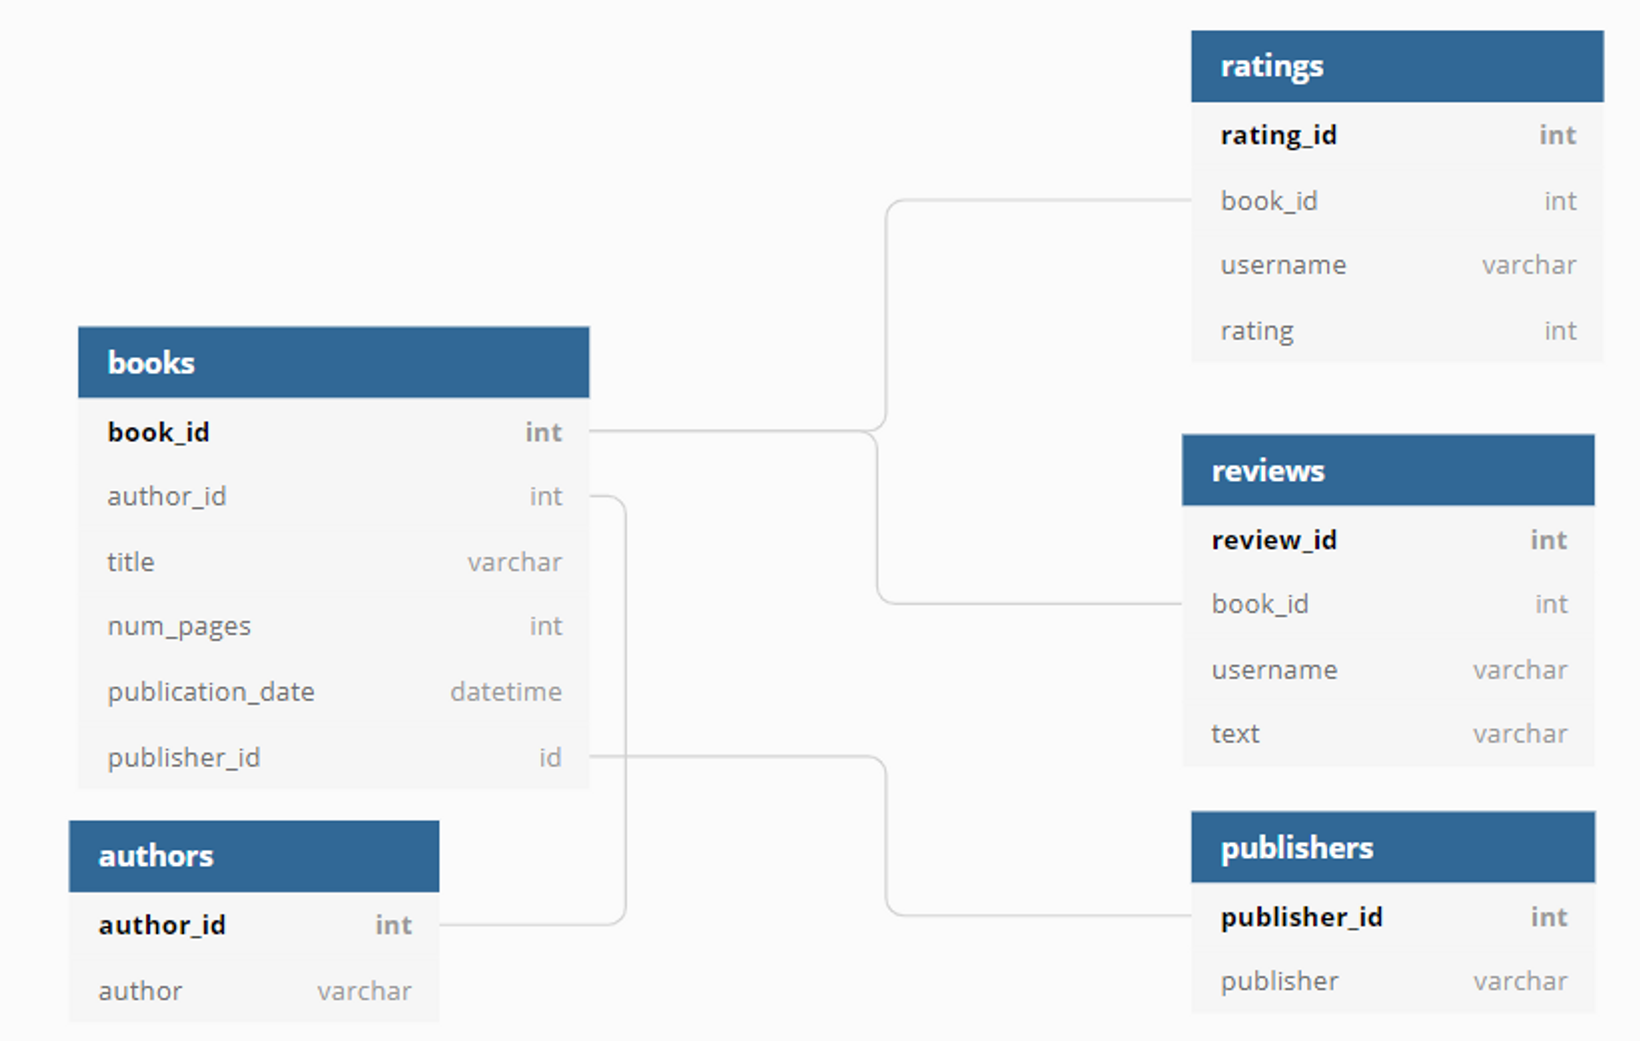

# Загрузка данных

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
def get_query(table,         # таблица основного запроса
              select='*',    # столбцы основного запроса, по умолчанию все
              limit=5,       # лимит строк для показа, по умолчанию 5 (если нужно посмотреть все, указываем "All")
              where='no',    # указываем выражение для where (отключено по умолчанию)
              groupby='no',  # указываем выражение для group by (отключено по умолчанию)
              join='no',     # указываем параметры присоединения в виде словаря ({'how': ..., 'select': ..., 'on': ...})
              orderby='no'): # указываем столбец и порядок сортировки
    
    # join + orderby + groupby + where + limit / join + orderby + groupby / join + orderby / join + groupby / join
    if join!='no':
        if orderby!='no':
            if groupby!='no':
                # join + orderby + groupby + where + limit
                if where!='no':
                    query = f'''
                            SELECT {select}
                            FROM {table}
                            {join['how']} ({join['select']}) AS j ON {join['on']}
                            WHERE {where}
                            GROUP BY {groupby}
                            ORDER BY {orderby}
                            LIMIT {limit};
                            '''
                    return pd.io.sql.read_sql(query, con = engine)
                # join + orderby + groupby
                else:
                    query = f'''
                            SELECT {select}
                            FROM {table}
                            {join['how']} ({join['select']}) AS j ON {join['on']}
                            GROUP BY {groupby}
                            ORDER BY {orderby};
                            '''
                    return pd.io.sql.read_sql(query, con = engine)
            # join + orderby
            else:
                query = f'''
                        SELECT {select}
                        FROM {table}
                        {join['how']} ({join['select']}) AS j ON {join['on']}
                        ORDER BY {orderby};
                        '''
                return pd.io.sql.read_sql(query, con = engine)
        else:
            #join + groupby
            if groupby!='no':
                query = f'''
                        SELECT {select}
                        FROM {table}
                        {join['how']} ({join['select']}) AS j ON {join['on']}
                        GROUP BY {groupby};
                        '''
                return pd.io.sql.read_sql(query, con = engine)
            # join
            else:
                query = f'''
                        SELECT {select}
                        FROM {table}
                        {join['how']} ({join['select']}) AS j ON {join['on']};
                        '''
                return pd.io.sql.read_sql(query, con = engine)
        
    
    # where / where + orderby
    elif where!='no':
        if orderby=='no':
            query = f'''
                    SELECT {select}
                    FROM {table} 
                    WHERE {where};
                    '''
            return pd.io.sql.read_sql(query, con = engine)
        else:
            query = f'''
                    SELECT {select}
                    FROM {table} 
                    WHERE {where}
                    ORDER BY {orderby};
                    '''
            return pd.io.sql.read_sql(query, con = engine)
    
    # groupby + where / groupby
    elif groupby!='no':
        if where!='no':
            query = f'''
                SELECT {select}
                FROM {table} 
                GROUP BY {groupby}
                WHERE {where};
                '''
            return pd.io.sql.read_sql(query, con = engine)
        else:
            query = f'''
                SELECT {select}
                FROM {table} 
                GROUP BY {groupby};
                '''
            return pd.io.sql.read_sql(query, con = engine)
    
    # show table
    else:
        query = f'''
                SELECT {select}
                FROM {table} 
                LIMIT {limit};
                '''
        return pd.io.sql.read_sql(query, con = engine)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Интересный подход, но кажется, что в сумме 5 запрос на SQL будут короче чем эта функция🤔<br>
Проверим, как работает такой <code>SQL Query Builder</code></div> <br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> К сожалению, я это понял только тогда, когда пошли сложные вариации запросов)) </div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>О-опыт👍</div> 

In [4]:
get_query('books')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
get_query('authors')

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
get_query('publishers')

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [7]:
get_query('ratings')

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
get_query('reviews')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Все таблицы для проведения анализа получены, можно приступать к анализу.

Для увеличения глубины последующих анализов, рекомендуется доработать базу данных:
1. Добавить в таблицу books столбец с жанром книги. Данный столбец позволит группировать книги по жанрам и анализировать данные в этом разрезе. 
2. Создать новую таблицу с пользовательскими данными - username, email, дата регистрации, номер телефона, ФИО и другие персональные данные, которые запрашиваются при регистрации. Такая таблица позволит лучше анализировать аудиторию, а также может помочь в будущих маркетинговых активностях и их персонализации.
3. Создать таблицу с подписками (заказами) - username, дата первой подписки, дата последней подписки, количество оплат.
4. Создать таблицу с логами пользователей - событие, время и дата события, id книги (если есть), id оценки (если есть), id обзора (если есть).

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Коннект есть, бежим к анализу🚀</div> <br>

# Анализ данных

## Количество книг, вышедших после 1 января 2000 года

In [9]:
get_query(table="books", where="publication_date > date('2000-01-01')", select="COUNT(DISTINCT title) AS books_cnt")

,books_cnt
0,818


In [10]:
get_query(table="books",select="COUNT(DISTINCT title) AS books_cnt", limit="All")

,books_cnt
0,999


In [11]:
round(818 / 999 * 100)

82

Большинство книг в сервисе (82%) выпущено после 1 января 2000 года. Это говорит о том, что в ассортименте представлены книги в основном от современных авторов, либо переопубликованные книги.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
👍</div> <br>

## Количество обзоров и средняя оценка каждой книги

In [12]:
query = '''
        WITH rate AS (SELECT book_id,
                             AVG(rating) AS avg_rating
                      FROM ratings
                      GROUP BY book_id
        ),
        rev AS (SELECT book_id,
                       COUNT(review_id) AS reviews_cnt
                FROM reviews
                GROUP BY book_id
        )
        
        SELECT DISTINCT b.book_id, b.title, rev.reviews_cnt, rate.avg_rating
        FROM books b
        LEFT JOIN rate ON rate.book_id=b.book_id
        LEFT JOIN rev ON rev.book_id=b.book_id
        '''
pd.io.sql.read_sql(query, con = engine)

,book_id,title,reviews_cnt,avg_rating
0,725,The Firm,3.0,4.052632
1,163,Corelli's Mandolin,3.0,3.000000
2,801,The Monster at the End of this Book,3.0,4.750000
3,847,The Red Tent,5.0,3.411765
4,947,Twenty Thousand Leagues Under the Sea (Extraor...,3.0,4.600000
...,...,...,...,...
995,973,While I Was Gone,2.0,4.000000
996,917,The Yiddish Policemen's Union,2.0,4.500000
997,241,Farmer Boy (Little House #2),2.0,4.500000
998,802,The Moon is a Harsh Mistress,3.0,3.750000


In [13]:
df = pd.io.sql.read_sql(query, con = engine)
print('Среднее количество обзоров на книгу:', round(df['reviews_cnt'].mean()))
avg_rate = round(df['avg_rating'].mean())
print(f'Средняя оценка книг: {avg_rate}/5')

Среднее количество обзоров на книгу: 3
Средняя оценка книг: 4/5


Средняя оценка книг составляет 4 из 5 баллов, это можно использовать для ценностного предложения сервиса. А вот среднее количество обзоров на книги составляет всего 3, это говорит о невысокой популярности написания обзоров в сервисе и вряд ли можно использовать для УТП.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Кажется, отзывов слишком много в некоторых книг, для проверки себя предлагаю проверить для отдельно взятых книг, сколько у них отзывов в таблице с <code>reviews</code></div><br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
 В данном случае медианный рейтинг не очень подходит, тк рейтинг формируется из оценок по шкале 1-5, то есть она ограничена (не содержит выбросов). А медиана сильно огрубляет рейтинг, он всегда будет или целым числом или половинкой с целым</div> <br>
 
 <div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Да, я посчитал не количество обзоров, а количество оценок - запрос скорректировал, теперь в таблице верное количество обзоров, медиану заменил на среднее) К pandas прибег только потому, что им проще обработать информацию для выводов, из таблицы, которую получаем по запросу в статичном виде никаких выводов не получилось сделать( Данные для выводов округлил, поскольку они будут использоваться для маркетинговых целей, но вряд ли кто-то станет указывать среднюю оценку книг 3,89 </div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍<br>
Например, Кинопоиск же указывает средний рейтинг фильма с 1 цифрой после запятой, думаю и с книгами так будет удобнее. Ниже пример с литреса, 
    
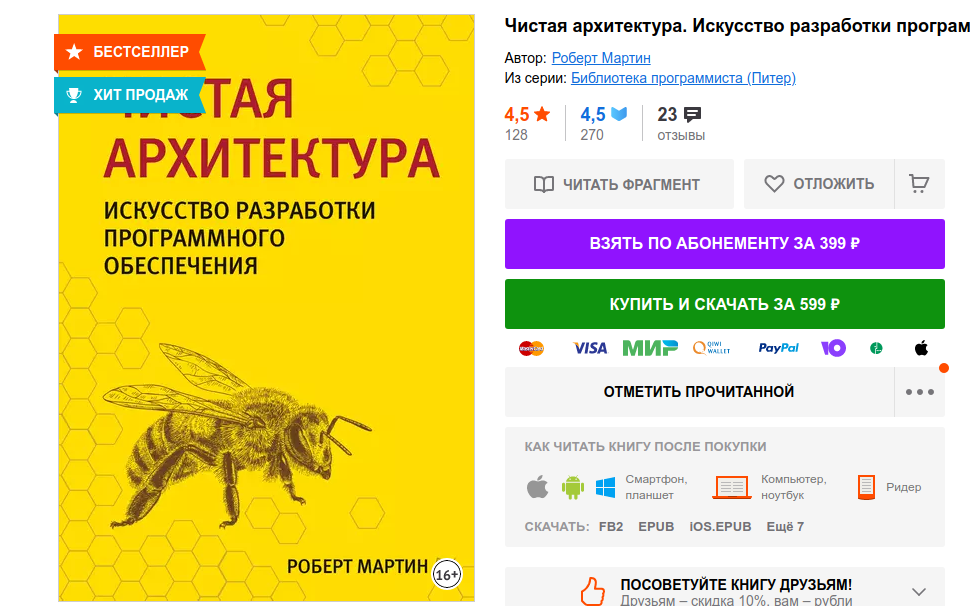
</div> 

## Определение издательства, выпустившего наибольшее количество книг с более 50 страниц

In [14]:
join_dict = {
    "how": "LEFT JOIN", 
    "select": "SELECT * FROM publishers", 
    "on": "j.publisher_id=b.publisher_id"
}

get_query(table="books AS b",
          select="j.publisher, COUNT(b.title) AS books_cnt",
          join=join_dict,
          where='b.num_pages > 50',
          groupby="j.publisher",
          orderby="books_cnt DESC",
          limit=1)

,publisher,books_cnt
0,Penguin Books,42


Наибольшее количество книг в сервисе от издателя Penguin Books.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
👍</div> <br>

## Определение автора с самой высокой средней оценкой книг (учитываются книги с > 50 оценок)

In [15]:
query = '''
        SELECT a.author, AVG(rt.avg_rating) AS avg_rating
        FROM books AS b
        JOIN (SELECT book_id
                   FROM ratings
                   GROUP BY book_id
                   HAVING COUNT(rating_id) >= 50
                    ) AS r ON r.book_id=b.book_id
        LEFT JOIN (SELECT author_id, author FROM authors GROUP BY author_id) AS a ON a.author_id=b.author_id
        LEFT JOIN (SELECT book_id, AVG(rating) AS avg_rating FROM ratings GROUP BY book_id) AS rt ON rt.book_id=b.book_id
        GROUP BY a.author
        ORDER BY avg_rating DESC
        LIMIT 1
        '''
pd.io.sql.read_sql(query, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844


Автор с самой высокой средней оценкой книг - Джоан Роулинг. Средний рейтинг среди её книг составляет - 4,3/5 баллов.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Сам подход при расчете верный, но есть нюансы:


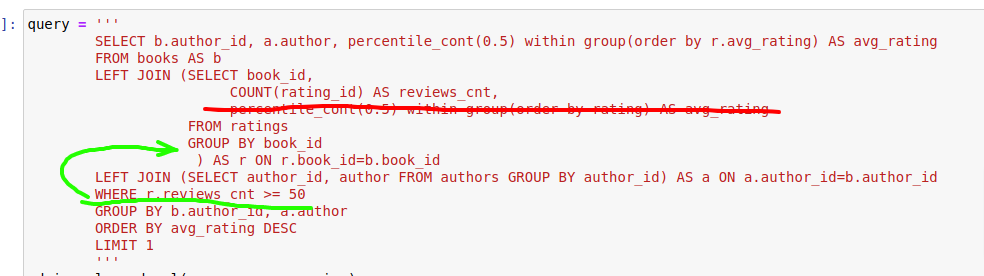
    
<ul>
    <li> 1. Можно внести <code>WHERE...</code> в подзапрос и преобразовать в <code>HAVING</code>
    <li> 2. Исключить расчет медианного рейтинга в подзапросе (тк у тебя происходит двойное усреднение, точнее "омедианивание"), а отбирать только <code>book_id</code> у которых более 50 оценок
    <li> 3. При помощи книг из п2 отобрать книги из таблицы books, присоединить автора и рейтинг, далее группировать по автору
    <li> 4. Считать именно СРЕДНИЙ рейтинг</ul>

</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Спасибо, поправил!</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Сойдемся на таком варинте👍<br>
<code>SELECT book_id, AVG(rating) AS avg_rating FROM ratings GROUP BY book_id</code> - вот тут ты усредняешь рейтинг по книгам, а потом еще раз по авторам - получается двойное усреднение - это может как повышать, так и понижать общий рейтинг. Поэтому от усреднения по книгам можно отказаться и проводить усреднение только один раз , по автору</div> 

## Среднее количество обзоров от пользователей (пользователи с > 50 отзывов)

In [16]:
query = '''
        WITH s AS (SELECT rv.username, COUNT(rv.review_id) AS reviews_cnt
                    FROM reviews AS rv
                    JOIN (SELECT username
                          FROM ratings
                          GROUP BY username
                          HAVING COUNT(rating_id) > 50) AS rt ON rt.username=rv.username
                    GROUP BY rv.username)
        
        SELECT percentile_cont(0.5) within group(order by s.reviews_cnt) AS avg_reviews
        FROM s
        '''
pd.io.sql.read_sql(query, con = engine)

,avg_reviews
0,25.5


Среднее количество обзоров от пользователей, поставивших более 50 оценок: 25.5.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
👍</div> <br>

# Итоговые выводы по анализу

В ходе анализа были загружены и исследованы все таблицы базы данных сервиса. На текущий момент есть возможности для улучшения полноты информации в данных таблицах, которые могут увеличить глубину последующих анализов:
1. Добавить в таблицу books столбец с жанром книги. Данный столбец позволит группировать книги по жанрам и анализировать данные в этом разрезе. 
2. Создать новую таблицу с пользовательскими данными - username, email, дата регистрации, номер телефона, ФИО и другие персональные данные, которые запрашиваются при регистрации. Такая таблица позволит лучше анализировать аудиторию, а также может помочь в будущих маркетинговых активностях и их персонализации.
3. Создать таблицу с подписками (заказами) - username, дата первой подписки, дата последней подписки, количество оплат.
4. Создать таблицу с логами пользователей - событие, время и дата события, id книги (если есть), id оценки (если есть), id обзора (если есть).

**Основные выводы, полученные в ходе анализа:**
1. Большинство книг в сервисе (82%) выпущено после 1 января 2000 года. Это говорит о том, что в ассортименте представлены книги в основном от современных авторов, либо переопубликованные книги.
2. Средняя оценка книг составляет 4 из 5 баллов, это можно использовать для ценностного предложения сервиса. А вот среднее количество обзоров на книги составляет всего 3, это говорит о невысокой популярности написания обзоров в сервисе и вряд ли можно использовать для УТП.
3. Наибольшее количество книг в сервисе от издателя Penguin Books.
4. Автор с самой высокой средней оценкой книг - Джоан Роулинг. Средний рейтинг среди её книг составляет - 4,3/5 баллов.
5. Среднее количество обзоров от пользователей, поставивших более 50 оценок: 25.5.

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Андрей, работа выполнена хорошо, но пока задачки 2 и 4 не поддались и требуют исправлений.

Исправляй и отправляй на проверку🛠